# Last Time

* say we want to find $c$ from $Xc = y$, but it is unsolvable
* solve $Xc = p$ instead.  $p$ is "close" to $y$, so this is pretty good
* $p = Py$, where $P$ is the projection matrix for X

# Finding a Fit Line: Two Approaches

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x = np.random.normal(10, 5, 30)
noise = np.random.normal(0, 6, 30)
y = x * -2.5 + 80 + noise # slope 2.5, intercept 80
df = pd.DataFrame({"x":x, "y":y, "const": 1})
df.head()

,x,y,const
0,13.541670,45.610926,1
1,16.187461,36.078346,1
2,4.014509,65.168197,1
3,12.720595,41.030342,1
4,8.673601,57.737672,1


(0.0, 79.29094675131253)

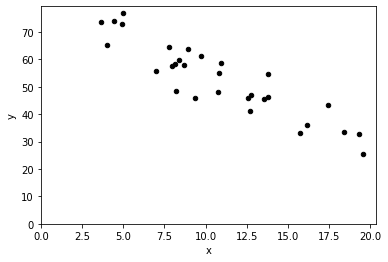

In [18]:
ax = df.plot.scatter(x="x", y="y", color="black")
ax.set_xlim(0)
ax.set_ylim(0)

In [24]:
X = df[["x", "const"]].values
y = df["y"].values.reshape(-1,1)
P = X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)

In [4]:
# TODO: add p column, computed as P@y
# TODO: scatter plot with x (x-axis) and p (y-axis)

In [25]:
p = P @ y
df["p"] = p
df.head()

,x,y,const,p
0,13.541670,45.610926,1,45.467989
1,16.187461,36.078346,1,38.427693
2,4.014509,65.168197,1,70.819207
3,12.720595,41.030342,1,47.652821
4,8.673601,57.737672,1,58.421635


(0.0, 79.29094675131253)

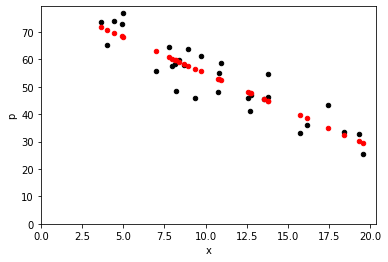

In [26]:
ax = df.plot.scatter(x="x", y="y", color="black")
df.plot.scatter(x="x", y="p", color="red", ax=ax)
ax.set_xlim(0)
ax.set_ylim(0)

# Approach 1: do calculation with numpy

$Xc = p = Py$, and $P = X(X^TX)^{-1}X^T$, so:

$Xc = X(X^TX)^{-1}X^Ty$

Multiply both sides by $X^T$ and simplify:

$X^TXc = (X^TX)(X^TX)^{-1}X^Ty$

$X^TXc = X^Ty$

Yay, $X^TX$ is a square matrix!  And $X^Ty$ is just a vector.

In [5]:
# TODO: solve for c
# TODO: plot fit line, pulling slope and intercept out of c

In [28]:
square_matrix = X.T @ X
square_matrix

array([[4119.15019689,  324.56163301],
       [ 324.56163301,   30.        ]])

In [29]:
new_vector = X.T @ y
new_vector

array([[15491.46800703],
       [ 1581.40787478]])

In [35]:
c = np.linalg.solve(square_matrix, new_vector)
slope, intercept = c.reshape(-1)
print(slope)
print(intercept)

-2.660941689739756
81.50158183175246


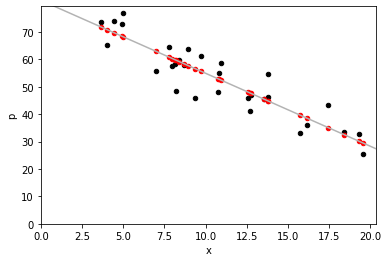

In [49]:
ax = df.plot.scatter(x="x", y="y", color="black")
df.plot.scatter(x="x", y="p", color="red", ax=ax)
ax.set_xlim(0)
ax.set_ylim(0)
x0 = ax.get_xlim()[0]
x1 = ax.get_xlim()[1]
y0 = slope * x0 + intercept
y1 = slope * x1 + intercept
ax.plot((x0, x1), (y0, y1), "0.7")

# Approach 2: let sklearn do it

In [6]:
from sklearn.linear_model import LinearRegression # scikit-learn

In [7]:
# TODO: compute slope, intercept
# TODO: plot points and fit line

In [63]:
lr = LinearRegression()
lr.fit(df[["x"]], df["y"])
slope = lr.coef_[0]
intercept = lr.intercept_
slope, intercept

(-2.660941689739762, 81.50158183175252)

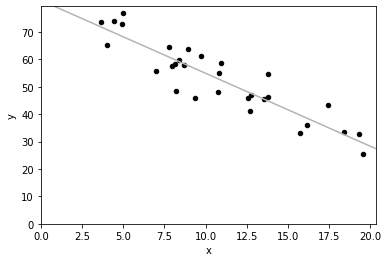

In [62]:
ax = df.plot.scatter(x="x", y="y", color="black")
ax.set_xlim(0)
ax.set_ylim(0)
x0 = ax.get_xlim()[0]
x1 = ax.get_xlim()[1]
y0 = slope * x0 + intercept
y1 = slope * x1 + intercept
ax.plot((x0, x1), (y0, y1), "0.7")